In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_excel('/content/paris_dataset - Copy (1).xlsx')

In [3]:
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,cleanliness_rating,guest_satisfatcion,bedrooms,dist,metro_dist,lng,lat
0,0,536.396682,Entire home/apt,False,False,5,False,0,9,89,1,1.351201,0.212346,2.35900,48.86800
1,1,290.101594,Private room,False,True,2,True,0,10,97,1,0.699821,0.193710,2.35385,48.86282
2,2,445.754497,Entire home/apt,False,False,4,False,0,10,100,1,0.968982,0.294343,2.36023,48.86375
3,3,211.343089,Private room,False,True,2,False,0,10,94,1,3.302319,0.234740,2.31714,48.87475
4,4,266.334234,Entire home/apt,False,False,2,True,0,9,88,1,1.402430,0.055052,2.33408,48.85384


Renaming some columns


In [4]:
data = data.rename(columns={data.columns[0]: 'id'})
data = data.rename(columns={data.columns[1]: 'Cost'})
data = data.rename(columns={data.columns[9]: 'guest_satisfaction'})

In [5]:
# Show details about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3558 non-null   int64  
 1   Cost                3558 non-null   float64
 2   room_type           3558 non-null   object 
 3   room_shared         3558 non-null   bool   
 4   room_private        3558 non-null   bool   
 5   person_capacity     3558 non-null   int64  
 6   host_is_superhost   3558 non-null   bool   
 7   multi               3558 non-null   int64  
 8   cleanliness_rating  3558 non-null   int64  
 9   guest_satisfaction  3558 non-null   int64  
 10  bedrooms            3558 non-null   int64  
 11  dist                3558 non-null   float64
 12  metro_dist          3558 non-null   float64
 13  lng                 3558 non-null   float64
 14  lat                 3558 non-null   float64
dtypes: bool(3), float64(5), int64(6), object(1)
memory usag

Handling Missing Values(if present)

In [6]:
missing_values=data.isnull().sum()
missing_values

id                    0
Cost                  0
room_type             0
room_shared           0
room_private          0
person_capacity       0
host_is_superhost     0
multi                 0
cleanliness_rating    0
guest_satisfaction    0
bedrooms              0
dist                  0
metro_dist            0
lng                   0
lat                   0
dtype: int64

Corrected values for the columns containg Float values

In [7]:
data['dist'] = data['dist'].round(3)
data['metro_dist'] = data['metro_dist'].round(3)
data['lat'] = data['lat'].round(3)
data['lng'] = data['lng'].round(3)

In [8]:
data.head()

,id,Cost,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,cleanliness_rating,guest_satisfaction,bedrooms,dist,metro_dist,lng,lat
0,0,536.396682,Entire home/apt,False,False,5,False,0,9,89,1,1.351,0.212,2.359,48.868
1,1,290.101594,Private room,False,True,2,True,0,10,97,1,0.700,0.194,2.354,48.863
2,2,445.754497,Entire home/apt,False,False,4,False,0,10,100,1,0.969,0.294,2.360,48.864
3,3,211.343089,Private room,False,True,2,False,0,10,94,1,3.302,0.235,2.317,48.875
4,4,266.334234,Entire home/apt,False,False,2,True,0,9,88,1,1.402,0.055,2.334,48.854


Metro distance as a factor


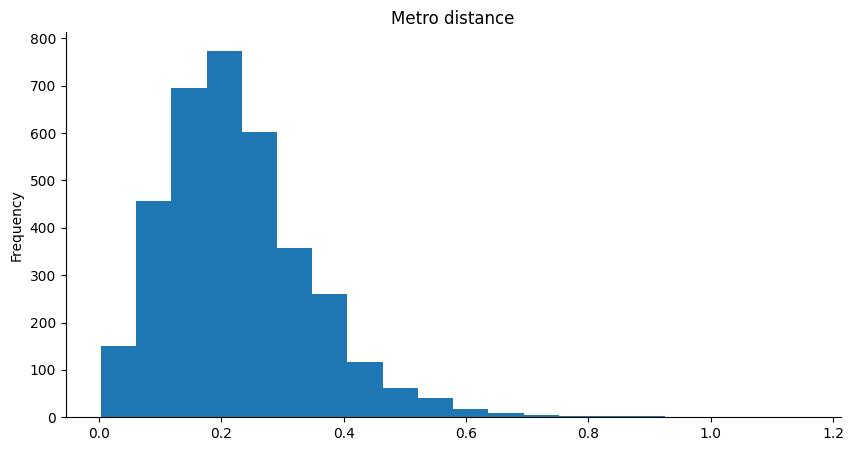

In [9]:
from matplotlib import pyplot as plt
data['metro_dist'].plot(kind='hist', title='Metro distance', figsize=(10, 5), bins=20)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Shows that metro distance 0.2 is most favourable and 0.6 is least

### Preference of Rooms



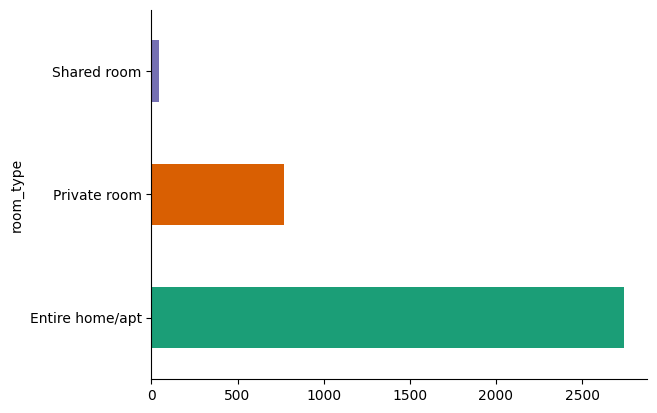

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

More preference is given to *Entire Appartment*
while least preference ig given to *shared Rooms*

## Scatter plot for Bedroom vs Cost

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px
fig1=px.scatter(data, x='bedrooms', y= 'Cost',size='person_capacity',color='bedrooms',hover_data=['cleanliness_rating','guest_satisfaction','dist','metro_dist'])
fig1

From the plot we can say,

*The most costly plot is having 3 Bderooms,Capacity=4 and metro distance=0.34 .

*Deamnd for 4 Bedroom and 5 Bedroom plot are bare minimum.

*Plots with 2 and 3 Bedrooms are in high demand.

# Cost vs Capacity

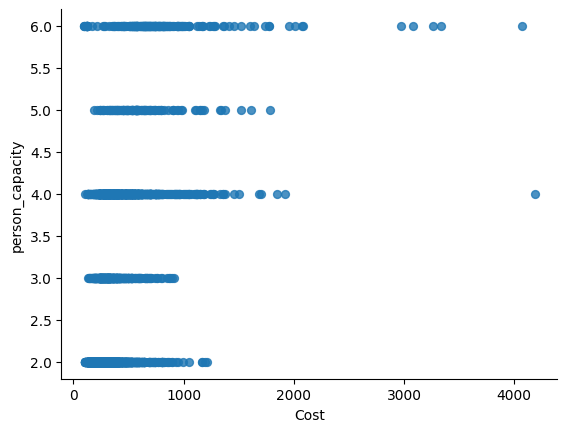

In [12]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Cost', y='person_capacity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)